## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data Exploration

The data provided contains checkout data and relevant user information for an e-commerce platform. The goal is to understand:
- What factors contribute to users making a purchase? Provide at least the top 2 contributing factors and calculate their potential impact
- What factors contribute to users generating higher basket amounts? Provide at least the top 2 contributing factors and calculate their potential impact

This dataset includes 229,847 records and 38 fields.

I added 4 variables and modified 1 variable, separately in BigQuery. Additional/modification variables:
1. user_tenure: modified from account_created_at, day difference between the account was created to today
2. checkout_month: month at checkout page
3. checkout_day: day at checkout page
4. checkout_date: date at checkout page
5. checkout_week: week at checkout page
6. lag_day_from_previous_purchase: day difference from previous purchase
7. lag_day_from_previous_remitted: day difference from previous remitted

In [55]:
#import data
data = pd.read_csv("insight-test-2.csv")
data.head()

,user_id,marketing_tier,province,user_type,user_group,account_type,user_tenure,referrer_type,user_register_from,basket_amount,...,Is_new,Num_product_types,Num_trx,Num_voucher_errors,Num_trx_voucher,Num_visit_promo_page,Average_session_length,Sessions,Gmv,Aov
0,110,tier_1,1,3,0,0,199,0,2,0.000021,...,0,0.129032,0.000027,0,0.002309,0.013514,0.040124,0.002350,0.033274,0.155961
1,4148,tier_3,9,4,0,0,196,0,0,0.000032,...,1,0.387097,0.000074,0,0.011547,0.020270,0.008720,0.010484,0.033349,0.156039
2,27610,tier_2,1,2,0,0,186,0,0,0.000017,...,0,0.161290,0.000047,0,0.030023,0.006757,0.007715,0.006508,0.033291,0.155926
3,50037,tier_3,1,3,0,0,181,0,1,0.000024,...,1,0.193548,0.000043,0,0.000000,0.000000,0.011174,0.007050,0.033254,0.155703
4,62283,tier_2,0,0,0,0,177,0,0,0.000070,...,0,0.258065,0.000497,1,0.055427,0.000000,0.002376,0.038322,0.033385,0.155703


In [52]:
data.shape

(229847, 38)

In [282]:
data.describe()

,user_id,province,user_type,user_group,account_type,user_tenure,referrer_type,user_register_from,basket_amount,is_paid,...,Is_new,Num_product_types,Num_trx,Num_voucher_errors,Num_trx_voucher,Num_visit_promo_page,Average_session_length,Sessions,Gmv,Aov
count,2.298470e+05,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,...,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000,229847.000000
mean,3.689137e+08,3.118096,0.695036,0.640617,0.003502,87.451113,1.128642,0.421319,0.000088,0.961653,...,0.129904,0.122215,0.000297,0.542835,0.006131,0.013168,0.004542,0.033127,0.033799,0.156813
std,2.143305e+08,3.613339,1.677578,0.479821,0.077322,11.537641,1.072323,0.683956,0.002982,0.192034,...,0.336198,0.126469,0.002272,3.111895,0.016770,0.031455,0.013106,0.047460,0.006509,0.011334
min,1.100000e+02,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.362190e+08,1.000000,0.000000,0.000000,0.000000,77.000000,0.000000,0.000000,0.000014,1.000000,...,0.000000,0.032258,0.000008,0.000000,0.000000,0.000000,0.001008,0.003073,0.033255,0.155761
50%,4.270587e+08,1.000000,0.000000,1.000000,0.000000,87.000000,1.000000,0.000000,0.000027,1.000000,...,0.000000,0.064516,0.000045,0.000000,0.000000,0.000000,0.002162,0.015184,0.033334,0.155979
75%,5.829234e+08,4.000000,0.000000,1.000000,0.000000,96.000000,2.000000,1.000000,0.000051,1.000000,...,0.000000,0.193548,0.000215,0.000000,0.004619,0.013514,0.004249,0.044107,0.033556,0.156417
max,6.283958e+08,26.000000,15.000000,1.000000,6.000000,199.000000,6.000000,7.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229847 entries, 0 to 229846
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         229847 non-null  int64  
 1   marketing_tier                  229071 non-null  object 
 2   province                        229847 non-null  int64  
 3   user_type                       229847 non-null  int64  
 4   user_group                      229847 non-null  int64  
 5   account_type                    229847 non-null  int64  
 6   user_tenure                     229847 non-null  int64  
 7   referrer_type                   229847 non-null  int64  
 8   user_register_from              229847 non-null  int64  
 9   basket_amount                   229847 non-null  float64
 10  is_paid                         229847 non-null  int64  
 11  is_remitted                     229847 non-null  int64  
 12  purchase        

In [284]:
data.dtypes

user_id                             int64
marketing_tier                     object
province                            int64
user_type                           int64
user_group                          int64
account_type                        int64
user_tenure                         int64
referrer_type                       int64
user_register_from                  int64
basket_amount                     float64
is_paid                             int64
is_remitted                         int64
purchase                            int64
time                               object
checkout_month                     object
checkout_day                       object
checkout_date                       int64
checkout_week                       int64
Lag_day_from_previous_purchase     object
Lag_day_from_previous_remitted     object
voucher_type                        int64
voucher_valid                       int64
voucher_max_amount                float64
voucher_percentage                

In [404]:
#Check Missing Value.
#Based on missing value checking, variable marketing_tier has 776 missing values. We can consider dropping the variable.
#Meanwhile, I assume the variable voucher_type and voucher_valid is intended null due to no voucher attached.
data.isna().sum()

user_id                               0
marketing_tier                      776
province                              0
user_type                             0
user_group                            0
account_type                          0
user_tenure                           0
referrer_type                         0
user_register_from                    0
basket_amount                         0
is_paid                               0
is_remitted                           0
purchase                              0
time                                  0
checkout_month                        0
checkout_day                          0
checkout_date                         0
checkout_week                         0
Lag_day_from_previous_purchase    74212
Lag_day_from_previous_remitted    79255
voucher_type                          0
voucher_valid                         0
voucher_max_amount                    0
voucher_percentage                    0
Voucher_min_purchase                  0


In [286]:
#Check Uniqueness
#There are 69,306 unique users
data.nunique()

user_id                            69306
marketing_tier                         4
province                              27
user_type                             16
user_group                             2
account_type                           7
user_tenure                          100
referrer_type                          7
user_register_from                     8
basket_amount                     125094
is_paid                                2
is_remitted                            2
purchase                               2
time                              229835
checkout_month                         4
checkout_day                           7
checkout_date                         31
checkout_week                          7
Lag_day_from_previous_purchase        91
Lag_day_from_previous_remitted        91
voucher_type                           2
voucher_valid                          2
voucher_max_amount                    26
voucher_percentage                    20
Voucher_min_purc

<AxesSubplot:>

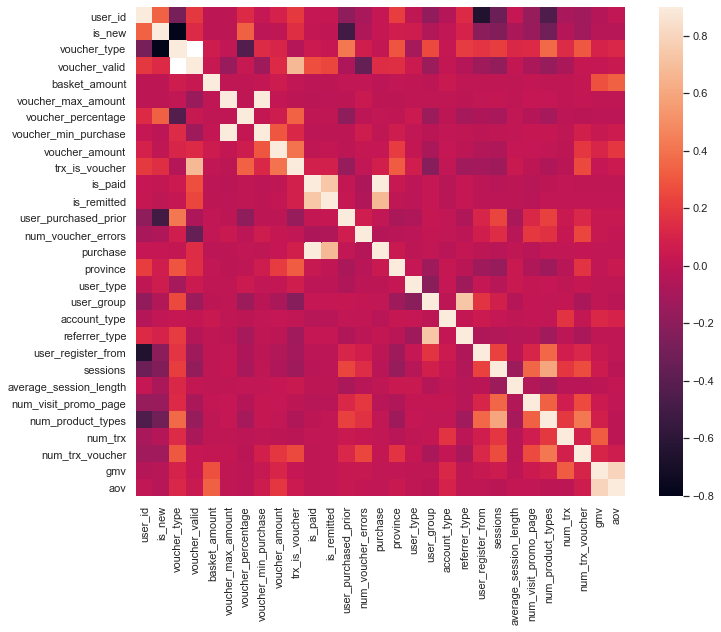

In [287]:
#Check Correlation between variables
corrmat=data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax=0.9,square=True)
#We can consider to choose one variable that have a high correlation with other variables.

## Target & Features Engineering (for y='purchase' )

In [288]:
data['purchase'].value_counts()

1    222467
0      7380
Name: purchase, dtype: int64

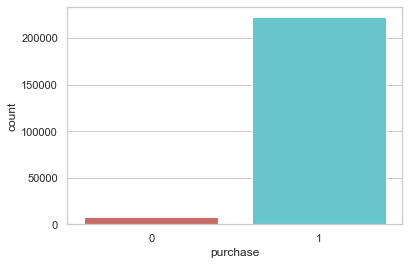

In [289]:
sns.countplot(x='purchase',data=data, palette='hls')
plt.show()

In [290]:
count_no_purchase = len(data[data['purchase']==0])
count_purchase = len(data[data['purchase']==1])
pct_of_no_purchase = count_no_purchase/(count_no_purchase+count_purchase)
print("percentage of no purchase is", pct_of_no_purchase*100)
pct_of_purchase = count_purchase/(count_no_purchase+count_purchase)
print("percentage of purchase", pct_of_purchase*100)

percentage of no purchase is 3.2108315531636262
percentage of purchase 96.78916844683637


Target Observation: our classes of purchase are imbalance. the ratio is 96:4. Before we go ahead to modelling, we need to do oversamping using SMOTE algorithm 
(Synthetic Minority Oversampling Technique)

In [291]:
data.groupby('purchase').mean()

,user_id,province,user_type,user_group,account_type,user_tenure,referrer_type,user_register_from,basket_amount,is_paid,...,Is_new,Num_product_types,Num_trx,Num_voucher_errors,Num_trx_voucher,Num_visit_promo_page,Average_session_length,Sessions,Gmv,Aov
purchase,,,,,,,,,,,,,,,,,,,,,
0,3.494309e+08,2.401491,0.762737,0.619377,0.014905,88.610434,1.045935,0.457995,0.000307,0.000000,...,0.090244,0.116658,0.000225,1.304878,0.004740,0.018056,0.004762,0.039885,0.033582,0.156517
1,3.695600e+08,3.141868,0.692790,0.641322,0.003124,87.412654,1.131386,0.420103,0.000081,0.993554,...,0.131219,0.122399,0.000300,0.517555,0.006177,0.013006,0.004534,0.032902,0.033807,0.156822


Observation for purchase transaction variable:
- total basket amount is lower
- user who has purchased prior is higher
- number of vouchers errors is lower
- number trx with voucher is higher
- number visit promo page is lower
- average session length and session prior is lower

Text(0, 0.5, 'Purchase')

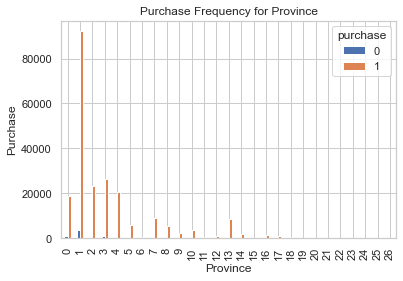

In [292]:
%matplotlib inline
pd.crosstab(data.province,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Province')
plt.xlabel('Province')
plt.ylabel('Purchase')

In [327]:
#Grouping province

In [56]:
data['province']=np.where(data['province'] =='0', 'Others', data['province'])
data['province']=np.where(data['province'] =='7', 'Others', data['province'])
data['province']=np.where(data['province'] =='13', 'Others', data['province'])
data['province']=np.where(data['province'] =='5', 'Others', data['province'])
data['province']=np.where(data['province'] =='8', 'Others', data['province'])
data['province']=np.where(data['province'] =='10', 'Others', data['province'])
data['province']=np.where(data['province'] =='9', 'Others', data['province'])
data['province']=np.where(data['province'] =='14', 'Others', data['province'])
data['province']=np.where(data['province'] =='16', 'Others', data['province'])
data['province']=np.where(data['province'] =='12', 'Others', data['province'])
data['province']=np.where(data['province'] =='17', 'Others', data['province'])
data['province']=np.where(data['province'] =='6', 'Others', data['province'])
data['province']=np.where(data['province'] =='11', 'Others', data['province'])
data['province']=np.where(data['province'] =='18', 'Others', data['province'])
data['province']=np.where(data['province'] =='19', 'Others', data['province'])
data['province']=np.where(data['province'] =='22', 'Others', data['province'])
data['province']=np.where(data['province'] =='23', 'Others', data['province'])
data['province']=np.where(data['province'] =='15', 'Others', data['province'])
data['province']=np.where(data['province'] =='21', 'Others', data['province'])
data['province']=np.where(data['province'] =='20', 'Others', data['province'])
data['province']=np.where(data['province'] =='24', 'Others', data['province'])
data['province']=np.where(data['province'] =='26', 'Others', data['province'])
data['province']=np.where(data['province'] =='25', 'Others', data['province'])

In [57]:
data['province'].unique()

array(['1', 'Others', '0', '3', '4', '2'], dtype=object)

Text(0, 0.5, 'Purchase')

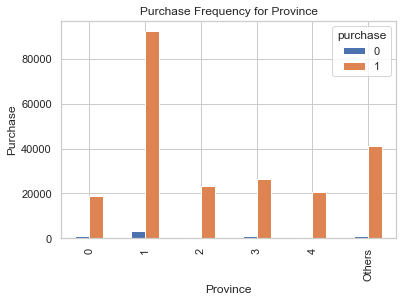

In [330]:
%matplotlib inline
pd.crosstab(data.province,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Province')
plt.xlabel('Province')
plt.ylabel('Purchase')

Text(0, 0.5, 'Purchase')

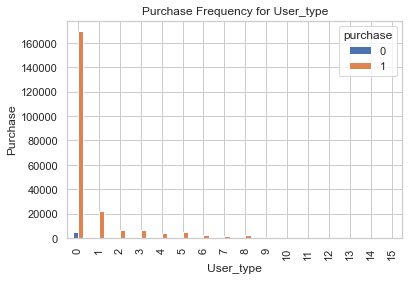

In [293]:
%matplotlib inline
pd.crosstab(data.user_type,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for User_type')
plt.xlabel('User_type')
plt.ylabel('Purchase')

Text(0, 0.5, 'Purchase')

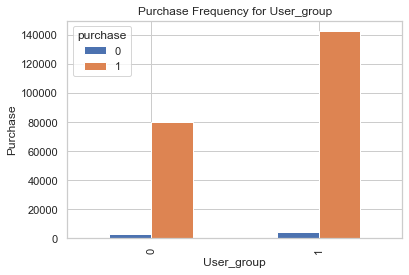

In [294]:
%matplotlib inline
pd.crosstab(data.user_group,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for User_group')
plt.xlabel('User_group')
plt.ylabel('Purchase')

User_group variable seems a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

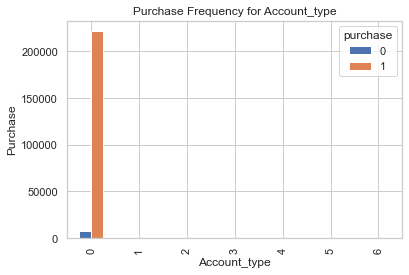

In [295]:
%matplotlib inline
pd.crosstab(data.account_type,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Account_type')
plt.xlabel('Account_type')
plt.ylabel('Purchase')

Account_type data dominated by account_type=0. Thus we can exclude account_type variable because it does not seem a strong predictor for the outcome variable.

Need to group user_tenure variable

Text(0, 0.5, 'Purchase')

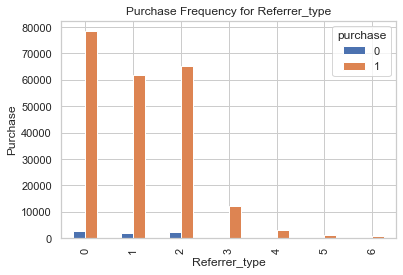

In [296]:
%matplotlib inline
pd.crosstab(data.referrer_type,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Referrer_type')
plt.xlabel('Referrer_type')
plt.ylabel('Purchase')

Referrer_type variable seems a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

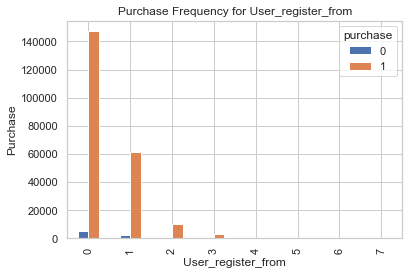

In [297]:
%matplotlib inline
pd.crosstab(data.user_register_from,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for User_register_from')
plt.xlabel('User_register_from')
plt.ylabel('Purchase')

User_register_from variable seems a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

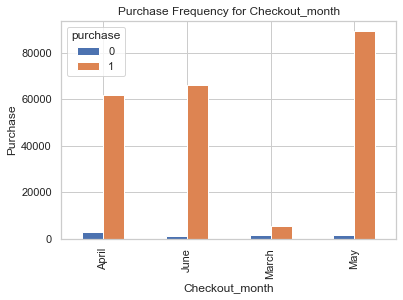

In [298]:
%matplotlib inline
pd.crosstab(data.checkout_month,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Checkout_month')
plt.xlabel('Checkout_month')
plt.ylabel('Purchase')

Checkout_month variable might be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

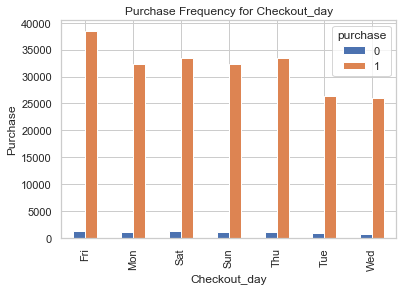

In [299]:
%matplotlib inline
pd.crosstab(data.checkout_day,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Checkout_day')
plt.xlabel('Checkout_day')
plt.ylabel('Purchase')

Checkout_day variable might be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

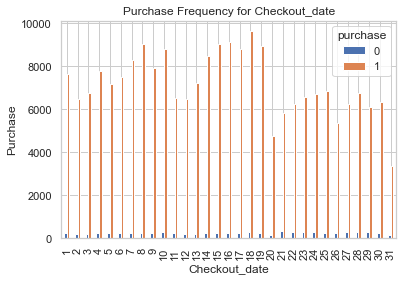

In [300]:
%matplotlib inline
pd.crosstab(data.checkout_date,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Checkout_date')
plt.xlabel('Checkout_date')
plt.ylabel('Purchase')

Checkout_date variable might be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

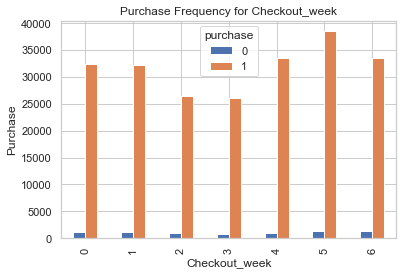

In [301]:
%matplotlib inline
pd.crosstab(data.checkout_week,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Checkout_week')
plt.xlabel('Checkout_week')
plt.ylabel('Purchase')

Checkout_date variable might be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

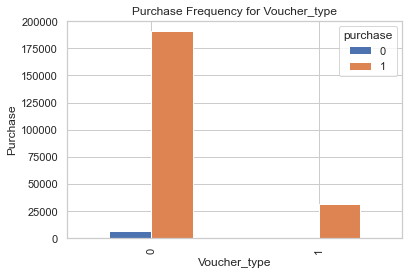

In [302]:
%matplotlib inline
pd.crosstab(data.voucher_type,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Voucher_type')
plt.xlabel('Voucher_type')
plt.ylabel('Purchase')

Voucher_type variable might be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase')

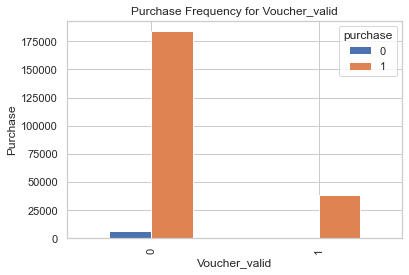

In [303]:
%matplotlib inline
pd.crosstab(data.voucher_valid,data.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Voucher_valid')
plt.xlabel('Voucher_valid')
plt.ylabel('Purchase')

Voucher_valid variable might be a good predictor of the outcome variable.

## Create dummy variables

In [58]:
cat_vars=['province','user_type','user_group','account_type','referrer_type','user_register_from','checkout_month','checkout_day','checkout_week', 'voucher_type', 'voucher_valid','Trx_is_voucher','User_purchased_prior', 'Is_new']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['province','user_type','user_group','account_type','referrer_type','user_register_from','checkout_month','checkout_day','checkout_week','voucher_type', 'voucher_valid','Trx_is_voucher','User_purchased_prior', 'Is_new']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['user_id', 'marketing_tier', 'user_tenure', 'basket_amount',
       'is_paid', 'is_remitted', 'purchase', 'time', 'checkout_date',
       'Lag_day_from_previous_purchase', 'Lag_day_from_previous_remitted',
       'voucher_max_amount', 'voucher_percentage', 'Voucher_min_purchase',
       'Voucher_amount', 'Num_product_types', 'Num_trx',
       'Num_voucher_errors', 'Num_trx_voucher', 'Num_visit_promo_page',
       'Average_session_length', 'Sessions', 'Gmv', 'Aov', 'province_0',
       'province_1', 'province_2', 'province_3', 'province_4',
       'province_Others', 'user_type_0', 'user_type_1', 'user_type_2',
       'user_type_3', 'user_type_4', 'user_type_5', 'user_type_6',
       'user_type_7', 'user_type_8', 'user_type_9', 'user_type_10',
       'user_type_11', 'user_type_12', 'user_type_13', 'user_type_14',
       'user_type_15', 'user_group_0', 'user_group_1', 'account_type_0',
       'account_type_1', 'account_type_2', 'account_type_3',
       'account_type_4', 'account_ty

In [59]:
cols=['user_id', 'user_tenure', 'basket_amount',
       'is_paid', 'is_remitted', 'purchase', 'checkout_date',
       'voucher_max_amount', 'voucher_percentage', 'Voucher_min_purchase',
       'Voucher_amount', 'Num_product_types', 'Num_trx',
       'Num_voucher_errors', 'Num_trx_voucher', 'Num_visit_promo_page',
       'Average_session_length', 'Sessions', 'Gmv', 'Aov', 'province_0',
       'province_1', 'province_2', 'province_3', 'province_4',
       'province_Others', 'user_type_0', 'user_type_1', 'user_type_2',
       'user_type_3', 'user_type_4', 'user_type_5', 'user_type_6',
       'user_type_7', 'user_type_8', 'user_type_9', 'user_type_10',
       'user_type_11', 'user_type_12', 'user_type_13', 'user_type_14',
       'user_type_15', 'user_group_0', 'user_group_1', 'account_type_0',
       'account_type_1', 'account_type_2', 'account_type_3',
       'account_type_4', 'account_type_5', 'account_type_6',
       'referrer_type_0', 'referrer_type_1', 'referrer_type_2',
       'referrer_type_3', 'referrer_type_4', 'referrer_type_5',
       'referrer_type_6', 'user_register_from_0', 'user_register_from_1',
       'user_register_from_2', 'user_register_from_3',
       'user_register_from_4', 'user_register_from_5',
       'user_register_from_6', 'user_register_from_7',
       'checkout_month_April', 'checkout_month_June',
       'checkout_month_March', 'checkout_month_May', 'checkout_day_Fri',
       'checkout_day_Mon', 'checkout_day_Sat', 'checkout_day_Sun',
       'checkout_day_Thu', 'checkout_day_Tue', 'checkout_day_Wed',
       'checkout_week_0', 'checkout_week_1', 'checkout_week_2',
       'checkout_week_3', 'checkout_week_4', 'checkout_week_5',
       'checkout_week_6', 'voucher_type_0', 'voucher_type_1',
       'voucher_valid_0', 'voucher_valid_1', 'Trx_is_voucher_0',
       'Trx_is_voucher_1', 'User_purchased_prior_0',
       'User_purchased_prior_1', 'Is_new_0', 'Is_new_1']
data_final = data_final[cols]

## Over-sampling using SMOTE

In [60]:
X = data_final.loc[:, data_final.columns != 'purchase']
y = data_final.loc[:, data_final.columns == 'purchase']

In [61]:
from imblearn.over_sampling import SMOTE

os = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no purchase in oversampled data",len(os_data_y[os_data_y['purchase']==0]))
print("Number of purchase in oversampled data",len(os_data_y[os_data_y['purchase']==1]))
print("Proportion of no purchase data in oversampled data is ",len(os_data_y[os_data_y['purchase']==0])/len(os_data_X))
print("Proportion of purchase data in oversampled data is ",len(os_data_y[os_data_y['purchase']==1])/len(os_data_X))

length of oversampled data is  311568
Number of no purchase in oversampled data 155784
Number of purchase in oversampled data 155784
Proportion of no purchase data in oversampled data is  0.5
Proportion of purchase data in oversampled data is  0.5


## Recursive feature elimination

In [86]:
data_final_vars=data_final.columns.values.tolist()
y=['purchase']
X=[i for i in data_final_vars if i not in y]

In [87]:
print(X)

['user_id', 'user_tenure', 'basket_amount', 'is_paid', 'is_remitted', 'checkout_date', 'voucher_max_amount', 'voucher_percentage', 'Voucher_min_purchase', 'Voucher_amount', 'Num_product_types', 'Num_trx', 'Num_voucher_errors', 'Num_trx_voucher', 'Num_visit_promo_page', 'Average_session_length', 'Sessions', 'Gmv', 'Aov', 'province_0', 'province_1', 'province_2', 'province_3', 'province_4', 'province_Others', 'user_type_0', 'user_type_1', 'user_type_2', 'user_type_3', 'user_type_4', 'user_type_5', 'user_type_6', 'user_type_7', 'user_type_8', 'user_type_9', 'user_type_10', 'user_type_11', 'user_type_12', 'user_type_13', 'user_type_14', 'user_type_15', 'user_group_0', 'user_group_1', 'account_type_0', 'account_type_1', 'account_type_2', 'account_type_3', 'account_type_4', 'account_type_5', 'account_type_6', 'referrer_type_0', 'referrer_type_1', 'referrer_type_2', 'referrer_type_3', 'referrer_type_4', 'referrer_type_5', 'referrer_type_6', 'user_register_from_0', 'user_register_from_1', 'use

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\ati.indrawati\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True False  True  True  True False  True False False False False
  True False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True False  True  True False False
 False False False False False False False False False  True False False
 False False  True  True  True  True  True False False]
[ 1  1 62  1  1  1 60  1 70 50 46 67  1 53 45 64 40 58 49 31  4 19 23 24
  1  1 26 35 32 36 33 43 41 42 52 59 54 61 65 74 71  2  1 34 51 66 47 68
 69 73  1 15 20 27 38 56 48 25 21 37 39 57 63 55 72 22  1 30  1  1  7 12
 10  5 16 14  9  8 17 13  6  1 11 28  3 29  1  1  1  1  1 44 18]


In [124]:
#cols=['user_tenure','checkout_date','voucher_percentage','Num_voucher_errors','province_Others','user_type_0','user_group_1','referrer_type_0','checkout_month_June','checkout_month_May','checkout_day_Fri','checkout_week_5']
#X=os_data_X[cols]
#y=os_data_y['purchase']

In [151]:
cols=['user_tenure','checkout_date','Voucher_amount', 'Num_product_types', 'Num_trx', 'Num_voucher_errors', 'Num_trx_voucher', 'Num_visit_promo_page', 'Average_session_length', 'Gmv','province_0', 'province_1', 'province_2', 'province_3', 'province_4', 'province_Others', 'user_type_0', 'user_type_1', 'user_type_2', 'user_type_3', 'user_type_4', 'user_type_7', 'user_type_8', 'user_type_11', 'account_type_1','account_type_3','user_register_from_1', 'user_register_from_2', 'user_register_from_3', 'user_register_from_6','checkout_month_April', 'checkout_month_June', 'checkout_month_March', 'checkout_month_May','User_purchased_prior_0', 'User_purchased_prior_1', 'Is_new_0', 'Is_new_1']
X=os_data_X[cols]
y=os_data_y['purchase']

In [152]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.209487
         Iterations 12
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.698      
Dependent Variable:     purchase             AIC:                  130614.9761
Date:                   2021-08-15 23:49     BIC:                  131019.6523
No. Observations:       311568               Log-Likelihood:       -65269.    
Df Model:               37                   LL-Null:              -2.1596e+05
Df Residuals:           311530               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         12.0000                                               
------------------------------------------------------------------------------
                         Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------

## Logistic Regression Model Fitting

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ati.indrawati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [154]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


## Confusion Matrix

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[40866  5760]
 [ 1664 45181]]


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     46626
           1       0.89      0.96      0.92     46845

    accuracy                           0.92     93471
   macro avg       0.92      0.92      0.92     93471
weighted avg       0.92      0.92      0.92     93471



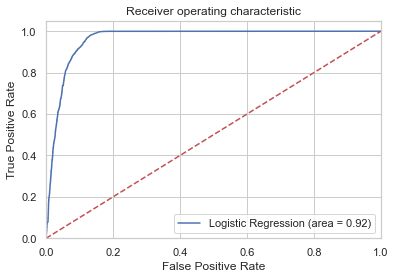

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Target & Features Engineering (for y='basket_amount' )

In [186]:
df = pd.read_csv("insight-test-2.csv")
df.head()

,user_id,marketing_tier,province,user_type,user_group,account_type,user_tenure,referrer_type,user_register_from,basket_amount,...,Is_new,Num_product_types,Num_trx,Num_voucher_errors,Num_trx_voucher,Num_visit_promo_page,Average_session_length,Sessions,Gmv,Aov
0,110,tier_1,1,3,0,0,199,0,2,0.000021,...,0,0.129032,0.000027,0,0.002309,0.013514,0.040124,0.002350,0.033274,0.155961
1,4148,tier_3,9,4,0,0,196,0,0,0.000032,...,1,0.387097,0.000074,0,0.011547,0.020270,0.008720,0.010484,0.033349,0.156039
2,27610,tier_2,1,2,0,0,186,0,0,0.000017,...,0,0.161290,0.000047,0,0.030023,0.006757,0.007715,0.006508,0.033291,0.155926
3,50037,tier_3,1,3,0,0,181,0,1,0.000024,...,1,0.193548,0.000043,0,0.000000,0.000000,0.011174,0.007050,0.033254,0.155703
4,62283,tier_2,0,0,0,0,177,0,0,0.000070,...,0,0.258065,0.000497,1,0.055427,0.000000,0.002376,0.038322,0.033385,0.155703


In [195]:
cols=['user_id', 'province', 'user_type', 'user_group', 'account_type', 'user_tenure', 'referrer_type', 'user_register_from','checkout_date', 'checkout_week', 'voucher_type', 'voucher_valid', 'voucher_max_amount', 'voucher_percentage', 'Voucher_min_purchase', 'Voucher_amount', 'Trx_is_voucher', 'User_purchased_prior', 'Is_new', 'Num_product_types', 'Num_trx', 'Num_voucher_errors', 'Num_trx_voucher', 'Num_visit_promo_page', 'Average_session_length', 'Sessions', 'Gmv', 'Aov']
X=df[cols]
y=df['basket_amount']

In [196]:
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression
from sklearn.model_selection import cross_val_score

In [197]:
def rsme_cv(model):
    return np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5))

In [198]:
#Model1: Linear Regression
model_lr=LinearRegression()
rsme_cv(model_lr).mean()

0.0022727043010507255

In [202]:
#Model 2: Lasso Regression
model_lasso=LassoCV(alphas=[1,0.1,0.01,0.0005])
rsme_cv(model_lasso).mean()

0.0024542358002277334

Linear Regression has the lower RSME

## Check Feature Importance

In [203]:
coef=pd.Series(model_ridge.fit(X,y).coef_,index=X.columns)
imp_coef=pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

<AxesSubplot:>

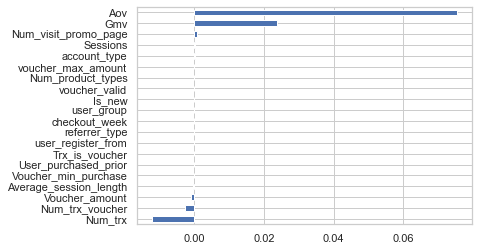

In [204]:
imp_coef.plot(kind='barh')